/Users/cleazhang/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cleazhang/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cleazhang/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training Confusion Matrix:
  [[3099  203]
 [ 267  139]]

Testing Confusion Matrix:
  [[341  25]
 [ 33  12]]

Training Accuracy Score:  0.8732470334412082

Testing Accuracy Score:  0.8588807785888077

Training Precision:  0.4064327485380117

Testing Precision:  0.32432432432432434

Training Recall:  0.34236453201970446

Testing Recall:  0.26666666666666666

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      3302
           1       0.41      0.34      0.37       406

    accuracy                           0.87      3708
   macro avg       0.66      0.64      0.65      3708
weighted avg       0.86      0.87      0.87      3708


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       366
           1       0.32      0.27      0.29        45

    accuracy                           0.86       411
   macro avg       0.62      0.60

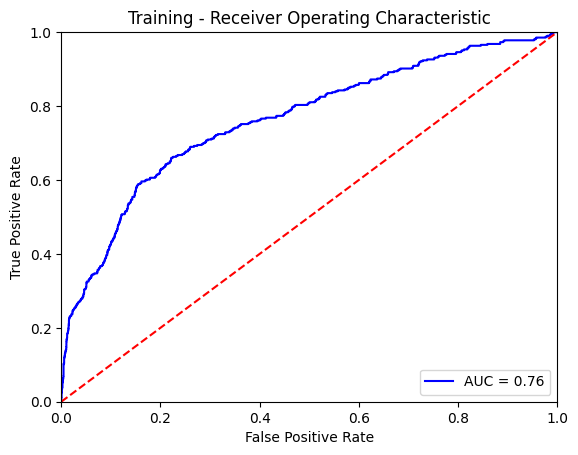

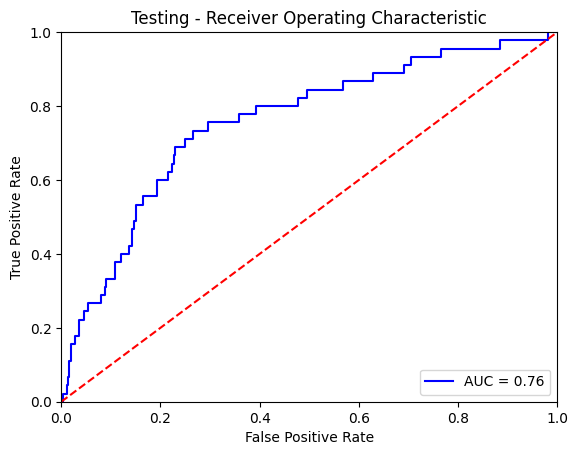

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
#from imblearn.over_sampling import SMOTE
from evaluate_classifier_performance import evaluate_classifier_performance

df_train = pd.read_csv('/Users/cleazhang/Downloads/bank-additional-dataset/kfold_fold_10_train.csv')
df_test = pd.read_csv('/Users/cleazhang/Downloads/bank-additional-dataset/kfold_fold_10_test.csv')
# del df_train['Unnamed: 0']
# del df_test['Unnamed: 0']


df_train_class = pd.DataFrame(df_train['y'])    
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

'''
### Resampling to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(df_train_features, df_train_class)
df_train_features = pd.DataFrame(X_res, columns=df_train_features.columns)
df_train_class = pd.DataFrame(y_res, columns=df_train_class.columns)
'''
### separate Continuous and Multinmoial Features
continuous_features = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

df_train_features_cont = df_train_features.loc[:,df_train_features.columns.isin(continuous_features)]
df_train_features_cate =  df_train_features.loc[:,~df_train_features.columns.isin(continuous_features)]

df_test_features_cont = df_test_features.loc[:, df_test_features.columns.isin(continuous_features)]
df_test_features_cate =  df_test_features.loc[:,~df_test_features.columns.isin(continuous_features)]

### Fit Gaussian NB model
gaussian_nb = GaussianNB()
gaussian_nb.fit(df_train_features_cont, df_train_class)

gaussian_predicted_prob_train = gaussian_nb.predict_proba(df_train_features_cont)
gaussian_predicted_prob_test = gaussian_nb.predict_proba(df_test_features_cont)

### Fit Multinomial NB model
multinomial_nb = MultinomialNB()
multinomial_nb.fit(df_train_features_cate, df_train_class)

multinomial_predicted_prob_train = multinomial_nb.predict_proba(df_train_features_cate)
multinomial_predicted_prob_test = multinomial_nb.predict_proba(df_test_features_cate)

### Fit probabilites on Gaussian again

combined_predicted_prob_train = np.vstack([gaussian_predicted_prob_train[:,1],multinomial_predicted_prob_train[:,1]]).T
combined_predicted_prob_test = np.vstack([gaussian_predicted_prob_test[:,1],multinomial_predicted_prob_test[:,1]]).T

gaussian_nb_final = GaussianNB()
gaussian_nb_final.fit(combined_predicted_prob_train, df_train_class)

predicted_train = gaussian_nb_final.predict(combined_predicted_prob_train)
predicted_test = gaussian_nb_final.predict(combined_predicted_prob_test)

predicted_prob_train = gaussian_nb_final.predict_proba(combined_predicted_prob_train)
predicted_prob_test = gaussian_nb_final.predict_proba(combined_predicted_prob_test)

evaluate_classifier_performance(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')
